# Main Simulation Loop Construction

Develop the main simulation loop for the formation model

01/05/2023

Andrew Weng

In [320]:
import os, sys

# Move the path up a level to be able to index into source files
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import pandas as pd
import numpy as np
import yaml
from src import cellsim as cellsim 

%matplotlib widget
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the configuration

In [321]:
with open("params/default.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

config

{'R_n': 2e-05,
 'L_n': 8e-05,
 'A_n': 0.1,
 'epsilon_n': 0.7,
 'a_sn': 105000,
 'alpha_SEI': 0.5,
 'delta_SEI_0': 5e-09,
 'SEI1_name': 'Li2EDC',
 'c_SEI1_0': 4541,
 'V_SEI1': 9.585e-05,
 'k_SEI1': 1e-11,
 'D_SEI11': 2e-16,
 'D_SEI12': 2e-17,
 'U_SEI1': 0.8,
 'SEI2_name': 'LiMC',
 'c_SEI2_0': 4541,
 'V_SEI2': 5.81e-05,
 'k_SEI2': 1e-11,
 'D_SEI21': 2e-16,
 'D_SEI22': 2e-17,
 'U_SEI2': 0.3,
 'c0': 15,
 'c1': 0.00166667,
 'c2': 0.00166667,
 'R0p': 0.0205,
 'R0n': 0.0205,
 'R1p': 0.079,
 'R1n': 0.079,
 'C1p': 76000,
 'C1n': 76000,
 'Cn': 3.14,
 'Cp': 3.02,
 'theta_n': 0.0,
 'theta_p': 1.0}

In [322]:
%autoreload
Q0 = 2.43 # Nominal cell capacity in Amp-hours
Ichg = +Q0/10
Idch = -Q0/10

# Baseline formation uses a C/20 current cut-off
Icv = Q0 / 20
sim_time_s = 150*3600

cell = cellsim.Cell(config)
sim = cellsim.Simulation(cell, sim_time_s)

# Baseline Formation Recipe

In [323]:
sim.run_rest(1, rest_time_hrs=2)
sim.run_chg_cccv(2, icc=Ichg, icv=Icv)
sim.run_dch_cccv(2, icc=Idch, icv=Idch)
sim.run_chg_cccv(3, icc=Ichg, icv=Icv)
sim.run_dch_cccv(3, icc=Idch, icv=Idch)
sim.run_chg_cccv(4, icc=Ichg, icv=Icv)
sim.run_dch_cccv(4, icc=Idch, icv=Idch)
sim.run_rest(5, rest_time_hrs=50)

# Make the plot

/Users/aweng/code/formation-modeling/src/cellsim.py:471: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  axs[11].plot(xx, self.q_sei, c='k', label='$Q_{\mathrm{sei}}$')


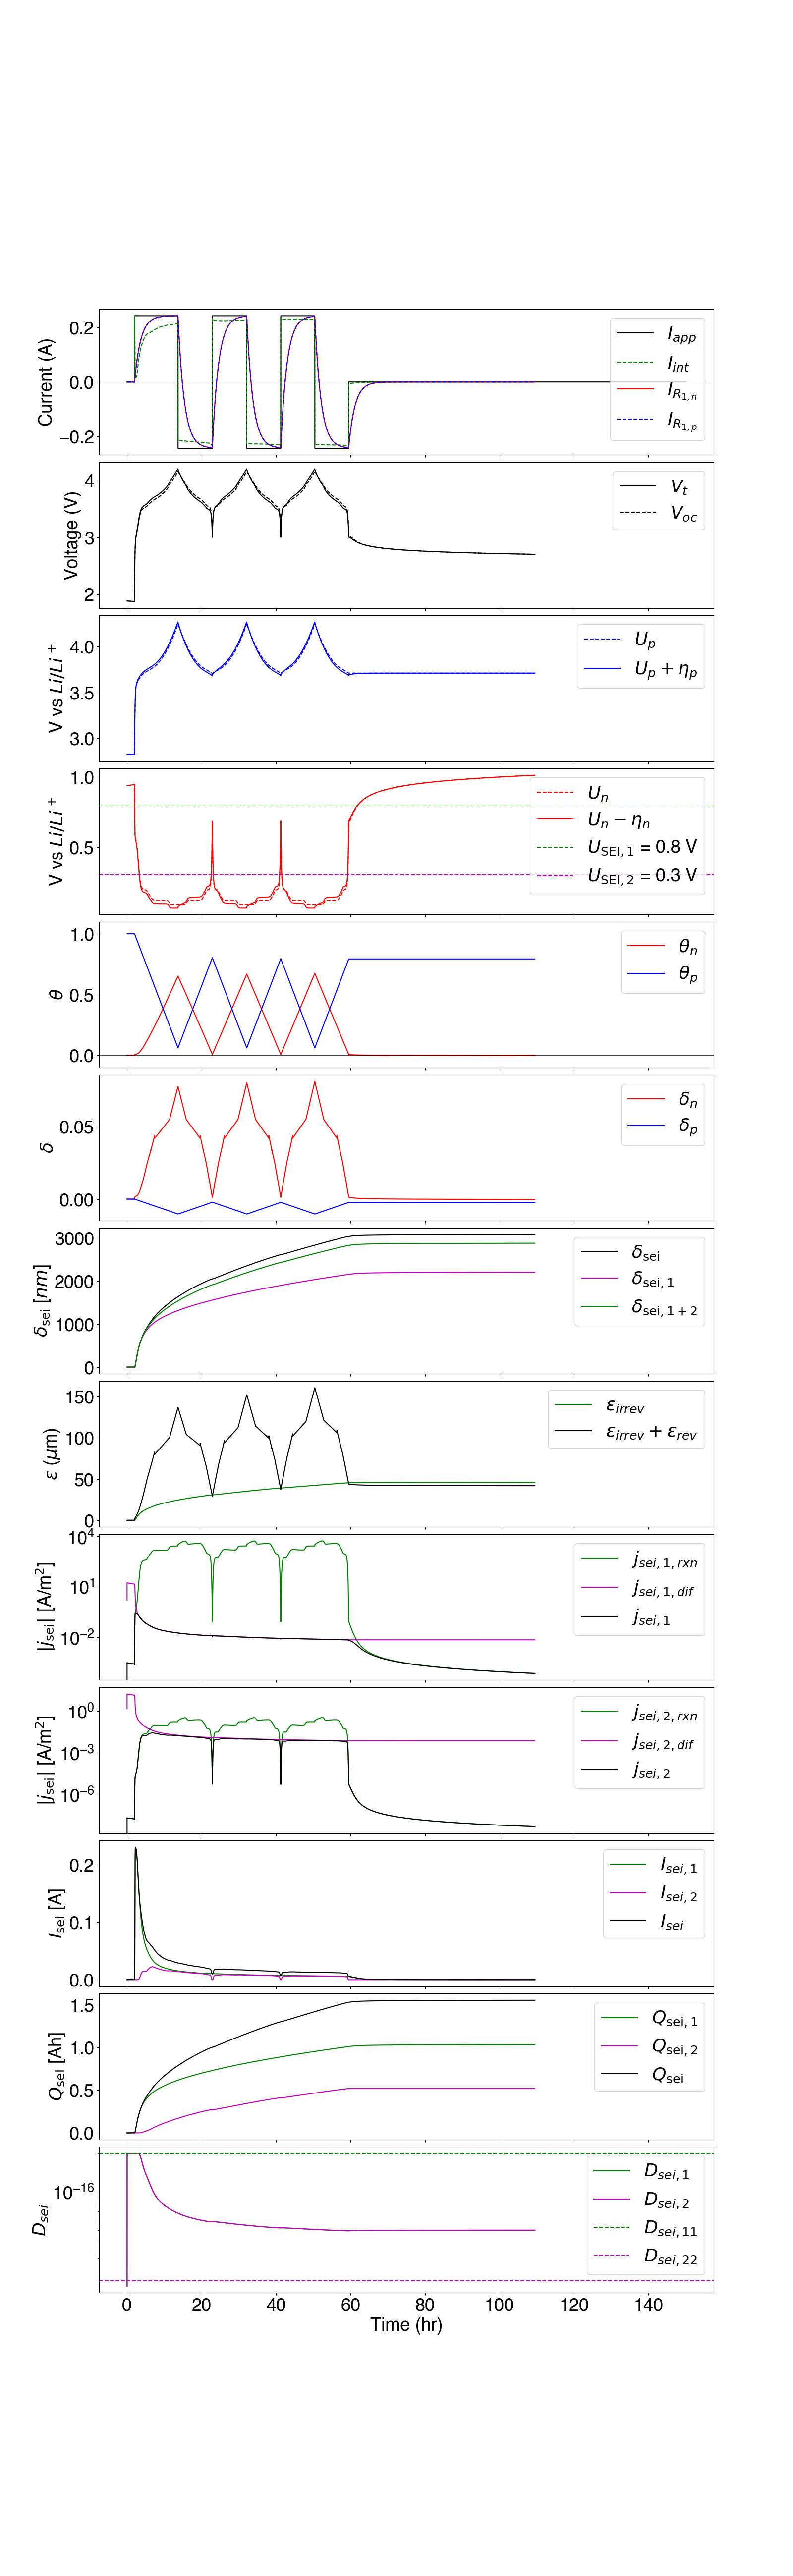

In [324]:
%autoreload
sim.plot()

In [325]:
df = pd.DataFrame(sim.__dict__)
df

,cell,dt,t,curr_k,vmax,vmin,i_cv,i_app,cycle_number,step_number,...,j_sei_dif2,eta_sei1,eta_sei2,delta_sei,delta_sei1,delta_sei2,delta_n,delta_p,expansion_rev,expansion_irrev
0,<src.cellsim.Cell object at 0x13613d070>,1.0,0.0,394203,4.2,3.0,0.025,0.0,1.0,3.0,...,NaN,0.000000,0.000000,5.000000e-09,2.500000e-09,2.500000e-09,0.000000e+00,-0.0,0.000000e+00,0.000000e+00
1,<src.cellsim.Cell object at 0x13613d070>,1.0,1.0,394203,4.2,3.0,0.025,0.0,1.0,3.0,...,1.593236,0.136495,0.636495,5.000153e-09,2.500153e-09,2.500000e-09,0.000000e+00,-0.0,0.000000e+00,7.500229e-08
2,<src.cellsim.Cell object at 0x13613d070>,1.0,2.0,394203,4.2,3.0,0.025,0.0,1.0,3.0,...,17.515693,0.136495,0.636495,5.000306e-09,2.500306e-09,2.500000e-09,0.000000e+00,-0.0,0.000000e+00,7.500458e-08
3,<src.cellsim.Cell object at 0x13613d070>,1.0,3.0,394203,4.2,3.0,0.025,0.0,1.0,3.0,...,17.515159,0.136496,0.636496,5.000458e-09,2.500458e-09,2.500000e-09,-4.570335e-09,-0.0,-7.617239e-12,7.500687e-08
4,<src.cellsim.Cell object at 0x13613d070>,1.0,4.0,394203,4.2,3.0,0.025,0.0,1.0,3.0,...,17.514624,0.136497,0.636497,5.000611e-09,2.500611e-09,2.500000e-09,-9.141471e-09,-0.0,-1.523582e-11,7.500917e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539995,<src.cellsim.Cell object at 0x13613d070>,1.0,539995.0,394203,4.2,3.0,0.025,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539996,<src.cellsim.Cell object at 0x13613d070>,1.0,539996.0,394203,4.2,3.0,0.025,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539997,<src.cellsim.Cell object at 0x13613d070>,1.0,539997.0,394203,4.2,3.0,0.025,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539998,<src.cellsim.Cell object at 0x13613d070>,1.0,539998.0,394203,4.2,3.0,0.025,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate cycle-by-cycle metrics

In [326]:
df = pd.DataFrame(sim.__dict__)
df['dq'] = np.abs(df['dt'] * df['i_app'] / 3600)
df_agg = df.groupby(['cycle_number', 'step_number'])['dq'].agg('sum')
df_agg

cycle_number  step_number
0.0           0.0            0.000000
1.0           3.0            0.000000
2.0           0.0            2.822107
              1.0            0.011070
              2.0            2.240190
3.0           0.0            2.229660
              1.0            0.011077
              2.0            2.218185
4.0           0.0            2.207183
              1.0            0.011058
              2.0            2.208803
5.0           3.0            0.000000
Name: dq, dtype: float64

/Users/aweng/code/formation-modeling/venv/lib/python3.8/site-packages/ipympl/backend_nbagg.py:279: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.manager.handle_json(content)


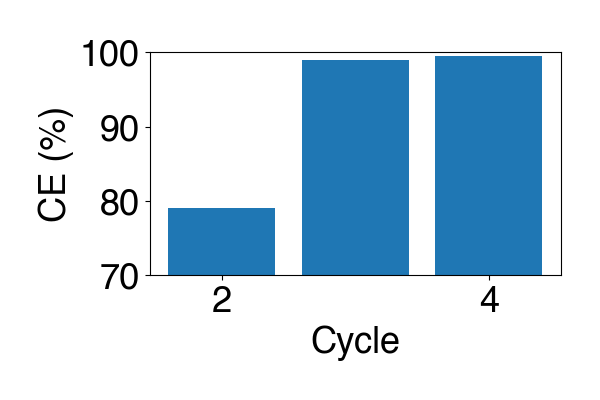

In [327]:
from matplotlib import pyplot as plt

ce = []
cycle_index = np.array([2, 3, 4])

for i in cycle_index:
    ce.append(df_agg[i][2] / (df_agg[i][0] + df_agg[i][1]))

ce = np.array(ce)

plt.figure(figsize=(6, 4))
plt.bar(cycle_index, ce*100)
plt.ylabel('CE (%)')
plt.grid(False)
plt.xlabel('Cycle')
plt.ylim([70, 100])
plt.show()


Text(0, 0.5, '$U_n$')

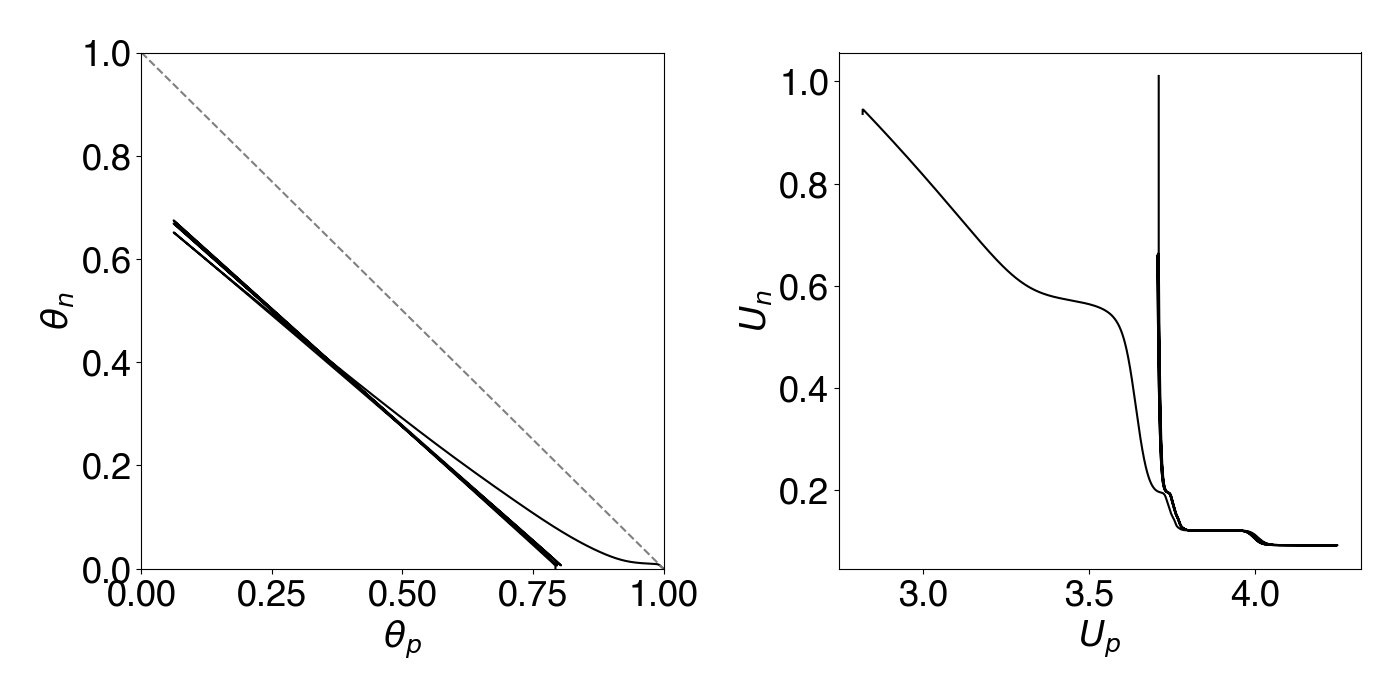

In [328]:
fh, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

xx = np.linspace(0, 1, 100)
ax0.plot(sim.theta_p, sim.theta_n, c='k')
ax0.plot(xx, 1-xx, c=(0.5,0.5,0.5), ls='--')
ax0.set_xlabel(r'$\theta_p$')
ax0.set_ylabel(r'$\theta_n$')
ax0.grid(False)
ax0.set_xlim((0,1))
ax0.set_ylim((0,1))

ax1.plot(sim.ocv_p, sim.ocv_n, c='k')
ax1.grid(False)
ax1.set_xlabel(r'$U_p$')
ax1.set_ylabel(r'$U_n$')